<a href="https://colab.research.google.com/github/prysykes/A-random-serial-number-generator/blob/main/PGD_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
pathh = 'MNISTClassifier'

for parent, dirs, files in os.walk(pathh, topdown=False):
  for file in files:
    file_path = os.path.join(parent, file)
    os.remove(file_path)
  for dir in dirs:
    dir_path = os.path.join(parent, dir)
    os.rmdir(dir_path)

  os.rmdir('/content/MNISTClassifier')

In [3]:
(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape(60000, 28, 28).astype("float32")/255
images = np.expand_dims(images, axis=3)
test_images = test_images.reshape(10000, 28, 28).astype("float32")/255
test_images = np.expand_dims(test_images, axis=3)
x_train, x_test = images[10000:], images[:10000]
y_train, y_test = labels[10000:], labels[:10000]

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(len(x_train))
x_train, x_val = x_train[10000:], x_train[0:10000]
y_train, y_val = y_train[10000:], y_train[0:10000]
print(len(x_train))

50000
40000


2


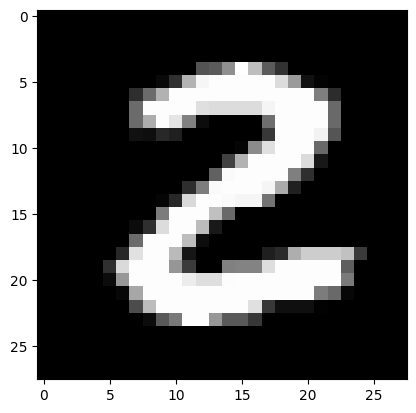

In [5]:
x_test[5].shape
digit = x_test[25]
fig = plt.figure
plt.imshow(digit, cmap='gray')
print(y_test[16])


In [6]:
few_twos = []
count = 0
for index, label in enumerate(y_test):
  if count > 9:
    break
  if label == 2:
    few_twos.append((index, label))
    count += 1

print(few_twos)

[(5, 2), (16, 2), (25, 2), (28, 2), (76, 2), (82, 2), (109, 2), (117, 2), (120, 2), (122, 2)]


In [38]:
class MNISTClassifierSmall(tf.keras.Model):
  def __init__(self):
    super(MNISTClassifierSmall, self).__init__()

    #define layers
    self.conv1 = tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1))
    self.conv2 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1))
    self.conv3 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1))
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(10)

    self.layers_list = [self.conv1, self.conv2, self.conv3, self.flatten, self.dense1]

  @tf.function
  def call(self, *args, **kwargs):
    #define forward pass
    #output is model logits

    activation_list = []
    out = args[0]
    for layer in self.layers_list:
      out = layer(out)
      activation_list.append(out)

    return out



In [39]:
model = MNISTClassifierSmall()
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

model.save('MNISTClassifierSmall')
# model = keras.models.load_model("MNISTClassifier.keras")

Epoch 1/10
1250/1250 [==============================] - 9s 5ms/step - loss: 0.1395 - accuracy: 0.9567 - val_loss: 0.0848 - val_accuracy: 0.9745
Epoch 2/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.0491 - accuracy: 0.9848 - val_loss: 0.0607 - val_accuracy: 0.9837
Epoch 3/10
1250/1250 [==============================] - 6s 4ms/step - loss: 0.0301 - accuracy: 0.9905 - val_loss: 0.0619 - val_accuracy: 0.9835
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0216 - accuracy: 0.9925 - val_loss: 0.0757 - val_accuracy: 0.9822
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0143 - accuracy: 0.9951 - val_loss: 0.0679 - val_accuracy: 0.9834
Epoch 6/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.0112 - accuracy: 0.9963 - val_loss: 0.0669 - val_accuracy: 0.9861
Epoch 7/10
1250/1250 [==============================] - 6s 4ms/step - loss: 0.0088 - accuracy: 0.9974 - val_loss: 0.0698 - val_accuracy:

In [31]:
class MNISTClassifier(tf.keras.Model):
  def __init__(self):
    super(MNISTClassifier, self).__init__()

    #define the layers for feature extracture
    self.conv1 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))
    self.max_pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    self.conv2 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')
    self.max_pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    self.flatten = tf.keras.layers.Flatten()
    self.dropout1 = tf.keras.layers.Dropout(0.25)
    self.dense1 = tf.keras.layers.Dense(128, activation='relu')
    self.dropout2 = tf.keras.layers.Dropout(0.5)
    self.dense2 = tf.keras.layers.Dense(10)
    self.layers_list = [self.conv1, self.max_pool1, self.conv2, self.max_pool2,
                        self.flatten, self.dropout1, self.dense1, self.dropout2, self.dense2]

  @tf.function
  def call(self, *args, **kwargs):
    #define forward pass
    #output is model logits

    activation_list = []
    out = args[0]
    for layer in self.layers_list:
      out = layer(out)
      activation_list.append(out)

    return out



In [32]:
model = MNISTClassifier()
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

model.save('MNISTClassifier')
model.summary()


Epoch 1/10
1250/1250 [==============================] - 9s 5ms/step - loss: 0.2683 - accuracy: 0.9161 - val_loss: 0.0672 - val_accuracy: 0.9800
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1003 - accuracy: 0.9697 - val_loss: 0.0513 - val_accuracy: 0.9834
Epoch 3/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.0731 - accuracy: 0.9783 - val_loss: 0.0433 - val_accuracy: 0.9862
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0655 - accuracy: 0.9790 - val_loss: 0.0332 - val_accuracy: 0.9898
Epoch 5/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.0577 - accuracy: 0.9823 - val_loss: 0.0319 - val_accuracy: 0.9909
Epoch 6/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.0500 - accuracy: 0.9848 - val_loss: 0.0299 - val_accuracy: 0.9906
Epoch 7/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.0456 - accuracy: 0.9860 - val_loss: 0.0356 - val_accuracy:

Model: "mnist_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           multiple                  320       
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           multiple                  18496     
                                                                 
 max_pooling2d_1 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         multiple                  0         
                                                                 
 dropout (Dropout)           multiple             

## load model and make predictions

In [9]:
# select a few twos from the test dataset and reshape
# twos are at [(5, 2), (16, 2), (25, 2), (28, 2), (76, 2)]

twos_tuple = [(5, 2), (16, 2), (25, 2), (28, 2), (76, 2), (82, 2), (109, 2), (117, 2), (120, 2), (122, 2)]
reshaped_sample_twos = []
for tup in twos_tuple:
  a_two = x_test[tup[0]]
  a_two = np.reshape(a_two, (-1, 28, 28, 1))
  reshaped_sample_twos.append(a_two)
reshaped_sample_twos = np.array(reshaped_sample_twos)
# a_five = np.reshape(x_test[47], (-1, 28, 28, 1))
# print(a_five.shape)

In [10]:
print(reshaped_sample_twos.shape) #the network expects a rank 4 tensor ie. batch, width, hieght, channel

(10, 1, 28, 28, 1)


In [44]:
# location of 2 in x_test # number 2 are found in these location: [(5, 2), (16, 2), (25, 2), (28, 2), (76, 2)]
model = tf.keras.models.load_model('MNISTClassifierSmall')

prediction = []
for sample in reshaped_sample_twos:
  sample_prediction = model(sample)
  prediction.append(sample_prediction)
# print(np.argmax(prediction))
print(np.argmax(prediction[0]))

2


In [45]:
print(np.argmax(prediction[1]))

2


In [14]:
reshaped_sample_twos[0].shape
print("hh", reshaped_sample_twos[0].shape)
#squeze to drop first dim
squeze_two = np.expand_dims(np.squeeze(reshaped_sample_twos[2]), axis=2)
squeze_two.shape
x = squeze_two
x = np.expand_dims(x, axis=0)
x = tf.convert_to_tensor(x)
y = y_test[5]
y = tf.convert_to_tensor(y)

print(y)
print(x.shape)

hh (1, 28, 28, 1)
tf.Tensor(2, shape=(), dtype=uint8)
(1, 28, 28, 1)


In [47]:
print(np.argmax(model(reshaped_sample_twos[0])))

2


In [48]:
xxx = model(reshaped_sample_twos[5])

In [49]:
print(xxx)

tf.Tensor(
[[-14.885328 -30.39338   29.052938  -8.242711 -46.663902 -32.592834
  -32.010193 -37.95364  -12.967822 -32.118626]], shape=(1, 10), dtype=float32)


In [60]:
# class_arr = [model(x) for x in reshaped_sample_twos]

# print(class_arr[3])

In [61]:
class_arr = [tf.convert_to_tensor(y_test[tup[0]]) for tup in twos_tuple]
print(class_arr)

[<tf.Tensor: shape=(), dtype=uint8, numpy=2>, <tf.Tensor: shape=(), dtype=uint8, numpy=2>, <tf.Tensor: shape=(), dtype=uint8, numpy=2>, <tf.Tensor: shape=(), dtype=uint8, numpy=2>, <tf.Tensor: shape=(), dtype=uint8, numpy=2>, <tf.Tensor: shape=(), dtype=uint8, numpy=2>, <tf.Tensor: shape=(), dtype=uint8, numpy=2>, <tf.Tensor: shape=(), dtype=uint8, numpy=2>, <tf.Tensor: shape=(), dtype=uint8, numpy=2>, <tf.Tensor: shape=(), dtype=uint8, numpy=2>]


In [111]:
def pgd_attack(model, x, y, epsilon, alpha, num_iter):
  #Generate adversarial example using PGD

  x = tf.cast(x, tf.float32)
  y = tf.one_hot(y, 10)
  y = np.reshape(y, (1,10))
  # Initialize the adversarial example as the origianl copy of the input image

  num_iterations = 1

  for _ in range(num_iter):
    with tf.GradientTape() as tape:
      tape.watch(x)
      logits = model(x)
      logits = logits
      # print("logits shape: ", logits.shape)


      loss = tf.keras.losses.categorical_crossentropy(y, logits, from_logits=True)

      # loss = tf.keras.losses.CategoricalCrossentropy()(y, logits)

    #compute gradients of the loss wrt the adversarial example
    gradients = tape.gradient(loss, x)
    # print("gradient shape: ", gradients.shape)

    #Update the adversarial example by taking a small step in the direction of the gradient
    # x_adv = x + alpha * tf.sign(gradients)

    # Project the perturbed example back onto the epsilon-ball arround the original input
    # perturbation = tf.clip_by_value((alpha * tf.sign(gradients)), -epsilon, epsilon)
    # perturbation = alpha * tf.sign(gradients) #working

    perturbation = tf.clip_by_value((alpha * tf.sign(gradients)), -epsilon, epsilon)

    x_adv = tf.clip_by_value(x + perturbation, 0, 1) # ensure adversarial image is bound between 0, 1
    x = x_adv
    if num_iterations%100 == 0:
      print(f"Num_iterations: {num_iterations} \n Y_Pred: {np.argmax(logits)} \n Y: {np.argmax(y)}")
      print("\n", "logits", logits)
    if np.argmax(model(x_adv)) != np.argmax(y):
      break
    num_iterations += 1

  return x_adv , perturbation

## Batch Operations

### Batch Attack

In [99]:
def batch_predict(model, results_arr, original_img_arr):
  predictions = {"original": [],
                 "adversarial": []}
  for element in zip(results_arr, original_img_arr):
    # print("element", element[0])
    orig_current_pred = model(element[1])
    adv_current_pred = model(element[0][0])
    orig_current_pred = np.argmax(orig_current_pred)
    adv_current_pred = np.argmax(adv_current_pred)

    predictions['original'].append(orig_current_pred)
    predictions['adversarial'].append(adv_current_pred)

  print("predictions", predictions)
  return predictions

In [64]:
def run_attacks(model, img_arr, class_arr, epsilon, alpha, num_iter, att_func):
  result = []
  # result contains a tupple of AE and Pertubation

  for img, cls in zip(img_arr, class_arr):
    x_test_adv, perturbation = att_func(model, img, cls, epsilon, alpha, num_iter)
    result.append((x_test_adv, perturbation))

  return result

In [112]:
epsilon, alpha, num_iter = 0.5, 0.1, 1000

In [113]:
results = run_attacks(model, reshaped_sample_twos, class_arr, epsilon, alpha, num_iter,  pgd_attack)

In [114]:
batch_predictions = batch_predict(model, results, reshaped_sample_twos)

predictions {'original': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'adversarial': [8, 3, 8, 7, 3, 3, 0, 3, 7, 1]}


In [104]:
adv_pred = model.predict(results[0][0])
org_pred = model.predict(reshaped_sample_twos[0])

print("ori", np.argmax(org_pred))
print("adv", np.argmax(adv_pred))

1/1 [==============================] - 0s 21ms/step
ori 2
adv 8


## Prepare Batch

In [105]:
def prepare_for_plt(results_arr, org_img_arr):
  print(len(results_arr), len(org_img_arr))
  new_results_arr = []
  new_org_img_arr = []
  print(f"Image: {results[0][0].shape} \n Perturbation: {results[0][1].shape} \n Original: {reshaped_sample_twos[0].shape}")
  for tup in results_arr:
    reshaped_adv_img = np.squeeze(tup[0])
    reshaped_adv_img = np.expand_dims(reshaped_adv_img, axis=2)

    reshaped_perturb = np.squeeze(tup[1])
    reshaped_perturb = np.expand_dims(reshaped_perturb, axis=2)
    new_results_arr.append((reshaped_adv_img, reshaped_perturb))
  for img in org_img_arr:
    reshaped_img = np.squeeze(img)
    reshaped_img = np.expand_dims(reshaped_img, axis=2)
    new_org_img_arr.append(reshaped_img)

  print(f"ADV Image: { new_results_arr[0][0].shape} \n ADVPerturbation: {new_results_arr[0][1].shape} \n AAOriginal: {new_org_img_arr[0].shape}")

  return (new_results_arr, new_org_img_arr)


In [106]:
new_results_arr, new_org_img_arr = prepare_for_plt(results, reshaped_sample_twos)

10 10
Image: (1, 28, 28, 1) 
 Perturbation: (1, 28, 28, 1) 
 Original: (1, 28, 28, 1)
ADV Image: (28, 28, 1) 
 ADVPerturbation: (28, 28, 1) 
 AAOriginal: (28, 28, 1)


## Batch plot function

In [107]:
def batch_distance_measure(new_results_arr, new_org_img_arr):
  distance = []

  for idx, element in enumerate(new_results_arr):
    flattened_adv_img = element[0].flatten()
    flattened_org_img = new_org_img_arr[idx].flatten()
    cur_distance = np.linalg.norm(flattened_org_img - flattened_adv_img)
    distance.append(round(cur_distance, 2))


  return distance

In [108]:
distance_arr = batch_distance_measure(new_results_arr, new_org_img_arr)
print(distance_arr)

[3.53, 3.55, 2.11, 2.1, 3.62, 4.8, 3.6, 2.13, 2.04, 3.42]


In [109]:
def batch_plot_function(new_results_arr, new_org_img_arr, predictions, distance_arr, fig):
  # distance_arr = [1.11, 2.22, 3.33, 4.44, 5.55, 6.66, 7.77, 8.88, 9.99, 10.11]
  rows = len(new_results_arr)
  columns = 3
  i = 0

  for idx, arr in enumerate(new_results_arr):
    i+=1

    fig.add_subplot(rows, columns, i)
    plt.imshow(new_org_img_arr[idx], cmap="gray")
    cur_orig_prediction = predictions['original'][idx]
    plt.axis('off')
    plt.title(f'Original Image  Prediction: {cur_orig_prediction}')

    i+=1
    fig.add_subplot(rows, columns, i)
    plt.imshow(new_results_arr[idx][1], cmap="gray")
    plt.axis('off')
    print("disy", distance_arr[idx])
    plt.title(f'Perturbation Distance: {distance_arr[idx]}')

    i +=1
    fig.add_subplot(rows, columns, i)
    plt.imshow(new_results_arr[idx][0], cmap="gray")
    cur_adv_prediction = predictions['adversarial'][idx]
    plt.axis('off')
    plt.title(f'Adversarial Image  Prediction: {cur_adv_prediction}')


disy 3.53
disy 3.55
disy 2.11
disy 2.1
disy 3.62
disy 4.8
disy 3.6
disy 2.13
disy 2.04
disy 3.42


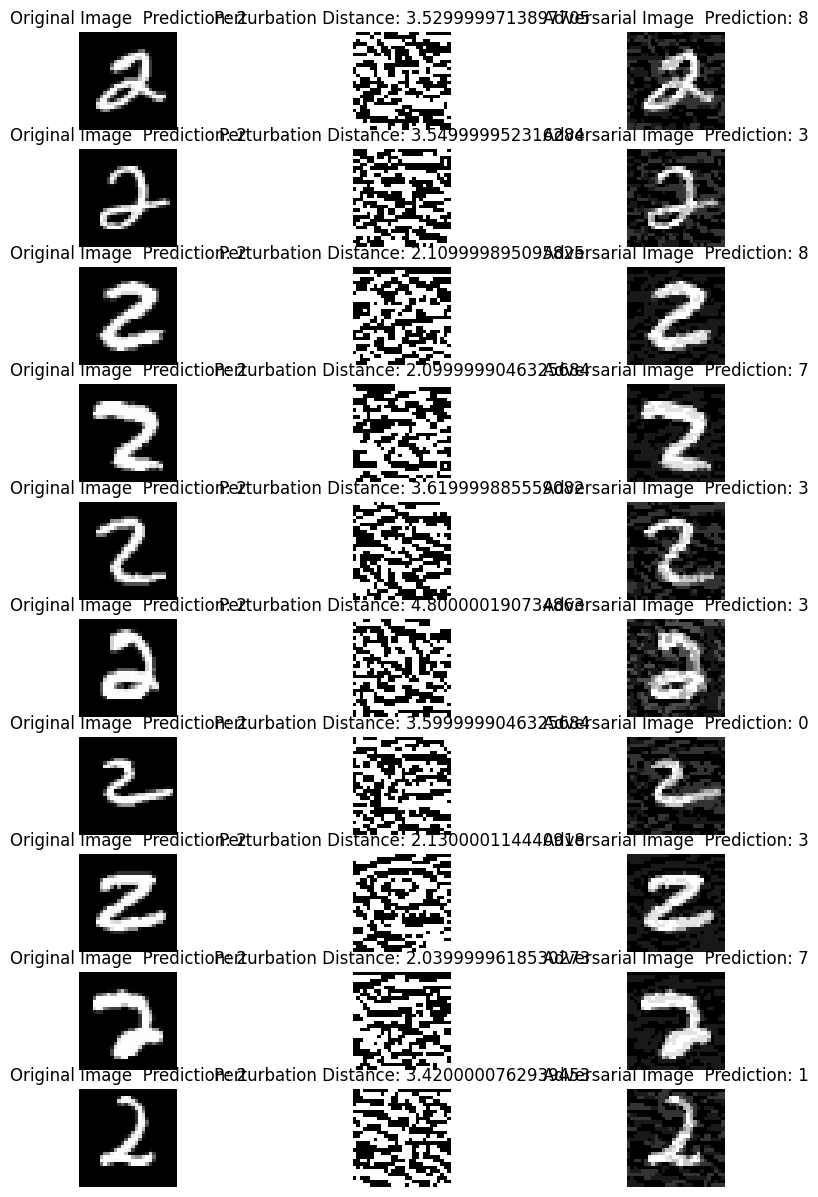

In [110]:
fig = plt.figure(figsize=(10, 15))

batch_plot_function(new_results_arr, new_org_img_arr, batch_predictions, distance_arr, fig)